<a href="https://colab.research.google.com/github/Rizkiramdani04/Portofolio_DS_DA/blob/main/Deep_Learning_Breat_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [ ]:
dataset=sklearn.datasets.load_breast_cancer()

In [ ]:
data=pd.DataFrame(dataset.data,columns=dataset.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data['label']=dataset.target

In [ ]:
data.shape

(569, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
data['label'].value_counts()

,count
label,
1,357
0,212


In [ ]:
data.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
X=data.drop(columns='label',axis=1)
Y=data['label']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
model=StandardScaler()
X_train_std=model.fit_transform(X_train)
X_test_std=model.transform(X_test)

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
modell=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
modell.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
history=modell.fit(X_train_std,Y_train,validation_split=0.1,epochs=20)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.7788 - loss: 0.6124 - val_accuracy: 0.8696 - val_loss: 0.4643
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9056 - loss: 0.3975 - val_accuracy: 0.8913 - val_loss: 0.3495
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9286 - loss: 0.2913 - val_accuracy: 0.9130 - val_loss: 0.2856
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9514 - loss: 0.2357 - val_accuracy: 0.9348 - val_loss: 0.2453
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9551 - loss: 0.2010 - val_accuracy: 0.9348 - val_loss: 0.2168
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9599 - loss: 0.1767 - val_accuracy: 0.9348 - val_loss: 0.1955
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9604 - loss: 0.1586 - val_accuracy: 0.9565 - val_loss: 0.1792
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9666 - loss: 0.1447 - val_accuracy: 0.9565 - val_loss

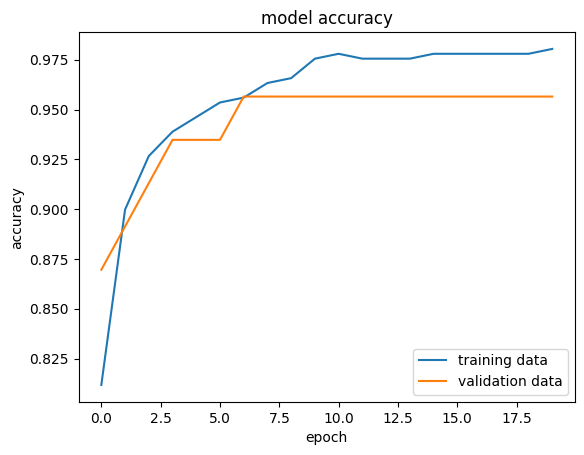

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data','validation data'],loc='lower right')

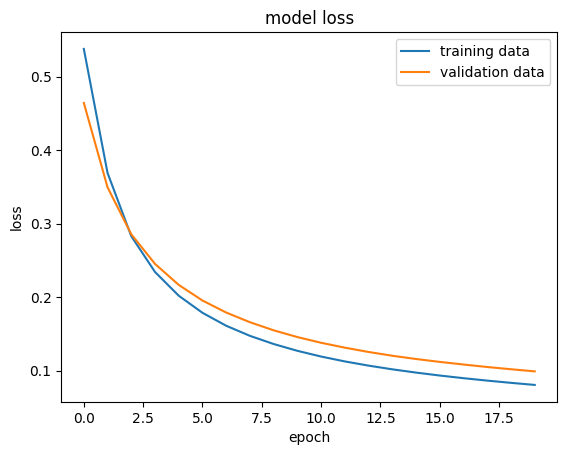

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data','validation data'],loc='upper right')

In [ ]:
loss,accuracy=modell.evaluate(X_test_std,Y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9502 - loss: 0.0982 
0.9561403393745422


In [ ]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.46649743 -0.13728933 -0.44421138 -0.48646498  0.28085007  0.04160589
 -0.11146496 -0.26486866  0.41524141  0.13513744 -0.02091509 -0.29323907
 -0.17460869 -0.2072995  -0.01181432 -0.35108921 -0.1810535  -0.24238831
 -0.33731758 -0.0842133  -0.2632354  -0.14784208 -0.33154752 -0.35109337
  0.48001942 -0.09649594 -0.03583041 -0.19435087  0.17275669  0.20372995]


In [ ]:
Y_pred=modell.predict(X_test_std)
print(Y_pred.shape)
print(Y_pred[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
(114, 2)
[0.43017596 0.80118746]


In [ ]:
print(X_test_std)

[[-0.46649743 -0.13728933 -0.44421138 ... -0.19435087  0.17275669
   0.20372995]
 [ 1.36536344  0.49866473  1.30551088 ...  0.99177862 -0.561211
  -1.00838949]
 [ 0.38006578  0.06921974  0.40410139 ...  0.57035018 -0.10783139
  -0.20629287]
 ...
 [-0.73547237 -0.99852603 -0.74138839 ... -0.27741059 -0.3820785
  -0.32408328]
 [ 0.02898271  2.0334026   0.0274851  ... -0.49027026 -1.60905688
  -0.33137507]
 [ 1.87216885  2.80077153  1.80354992 ...  0.7925579  -0.05868885
  -0.09467243]]


In [ ]:
print(Y_pred)

[[4.30175960e-01 8.01187456e-01]
 [9.01032805e-01 7.27481535e-03]
 [5.66690683e-01 4.45902385e-02]
 [2.51973391e-01 9.41234112e-01]
 [2.18846112e-01 9.89920974e-01]
 [9.18477833e-01 3.17312583e-07]
 [9.56274152e-01 6.06229514e-05]
 [6.16820037e-01 1.29404277e-01]
 [4.18951839e-01 2.90179282e-01]
 [5.71411848e-01 9.92564559e-01]
 [6.26831114e-01 9.66329694e-01]
 [7.33145177e-01 1.65478587e-01]
 [7.31362343e-01 9.86366153e-01]
 [6.51549578e-01 1.55606598e-01]
 [4.95151043e-01 9.91930127e-01]
 [9.24450219e-01 1.98359266e-02]
 [5.18997192e-01 9.84437227e-01]
 [2.61358887e-01 9.99112248e-01]
 [2.46530056e-01 9.99253750e-01]
 [8.67688775e-01 8.77549697e-04]
 [5.25686681e-01 8.27841580e-01]
 [4.09659058e-01 9.65586782e-01]
 [9.17348504e-01 1.15827479e-05]
 [3.93621683e-01 9.98870909e-01]
 [5.05850673e-01 9.95516658e-01]
 [4.88520592e-01 9.52664495e-01]
 [4.18708146e-01 9.74586308e-01]
 [2.20881581e-01 9.86781538e-01]
 [4.59513515e-01 9.81005013e-01]
 [8.70070875e-01 1.12231981e-04]
 [3.573884

In [ ]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[0.25, 0.56]
1
[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]


In [ ]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = model.transform(input_data_reshaped)

prediction = modell.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.5002018 0.9930567]]
[1]
The tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
